# Compute the single-point time spectra

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt
import pandas as pd

# Make all plots inline 
%matplotlib inline

import postproengine as ppeng

In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load

In [3]:
def spectrapoints():
    xrange = [0, 100, 200, 300, 400, 500]
    yrange = [0, 100, 200, 300, 400, 500]
    ptlist = []
    for x in xrange:
        for y in yrange:
            ptlist.append((x, y, 0))
    return ptlist

ppeng.spectrapoints = spectrapoints

In [4]:
yamlstring="""
globalattributes:
  verbose: False
  executeorder:
  - windspectra

windspectra:
- name: spectraZ027
  ncfile: /nscratch/gyalla/HFM/exawind-benchmarks/amr-wind/atmospheric_boundary_layer/neutral/runs/D_grid/post_processing/XYdomain_027_480000.nc
  group: Farm_XYdomain027
  pointlocationfunction: postproengine.spectrapoints
  csvfile: ../results/time_spectra_Z027_DGrid.csv
  kaimal:
    ustarsource: ablstatsfile
    ablstatsfile:  /nscratch/gyalla/HFM/exawind-benchmarks/amr-wind/atmospheric_boundary_layer/neutral/runs/D_grid/post_processing/abl_statistics480000.nc
    avgt:  [120000, 125000]
    csvfile: ../results/kaimal_Z027_DGrid.csv
    z: 27.0

- name: spectraZ090
  ncfile: /nscratch/gyalla/HFM/exawind-benchmarks/amr-wind/atmospheric_boundary_layer/neutral/runs/D_grid/post_processing/XYdomain_090_480000.nc
  group: Farm_XYdomain090
  pointlocationfunction: postproengine.spectrapoints
  csvfile: ../results/time_spectra_Z090_DGrid.csv
  kaimal:
    ustarsource: ablstatsfile
    ablstatsfile:  /nscratch/gyalla/HFM/exawind-benchmarks/amr-wind/atmospheric_boundary_layer/neutral/runs/D_grid/post_processing/abl_statistics480000.nc
    avgt:  [120000, 125000]
    csvfile: ../results/kaimal_Z090_DGrid.csv
    z: 90.0

"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)
yamldict['windspectra'][0]['timeindices'] = list(range(10000))[::5]
yamldict['windspectra'][1]['timeindices'] = list(range(10000))[::5]

In [5]:
# Run the driver
ppeng.driver(yamldict, verbose=True)

Initialized windspectra
Running windspectra
[============================================================] 100.0% 
Initialized kaimal inside windspectra
Executing kaimal
ustar =  0.203669036557992
[============================================================] 100.0% 
Initialized kaimal inside windspectra
Executing kaimal
ustar =  0.203669036557992


### Load Data

In [6]:
df_27_D  = pd.read_csv('../results/time_spectra_Z027_DGrid.csv')
df_90_D  = pd.read_csv('../results/time_spectra_Z090_DGrid.csv')
kaimal_27_D  = pd.read_csv('../results/kaimal_Z027_DGrid.csv')
kaimal_90_D  = pd.read_csv('../results/kaimal_Z090_DGrid.csv')

### Plot Spectra

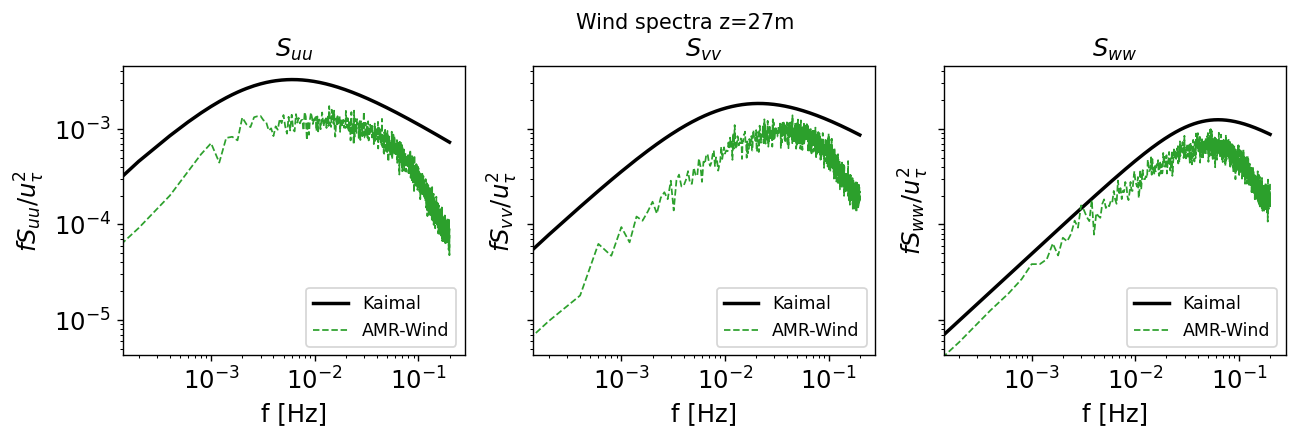

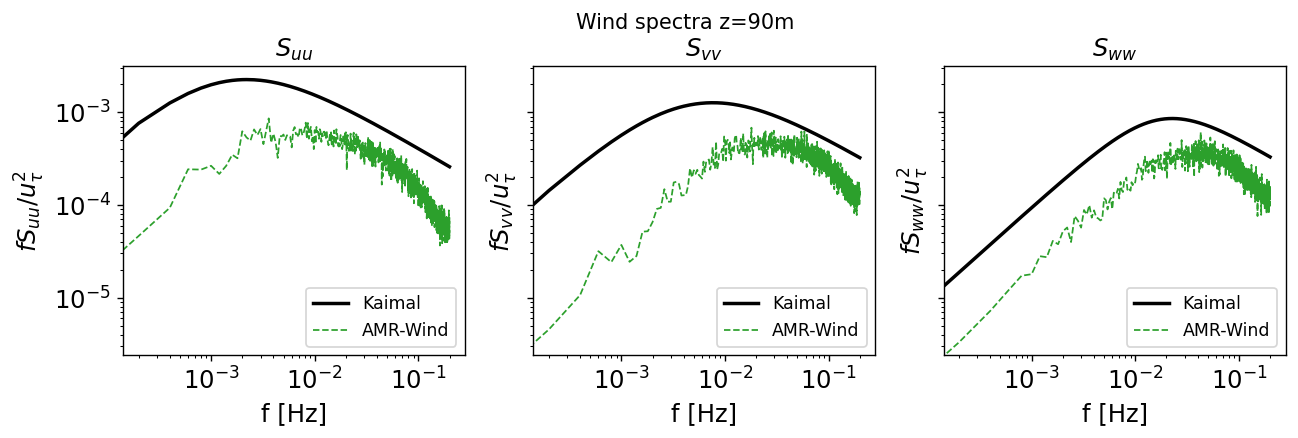

In [8]:
# Run the driver
fsize = 14
comps = ['Suu','Svv','Sww']
titles = ['$S_{uu}$','$S_{vv}$','$S_{ww}$']
dfs_D = [df_27_D,df_90_D]
heights = [27,90]
kaimals_D = [kaimal_27_D,kaimal_90_D]
for z in range(len(heights)):
    fig, axs = plt.subplots(1,3,figsize=(12,3), dpi=125, sharey=True)
    df_D = dfs_D[z]
    kaimal_D = kaimals_D[z]
    for axiter, ax in enumerate(axs):
        plt.sca(ax)
        plt.loglog(kaimal_D['f'],kaimal_D[comps[axiter]],c='k',label='Kaimal',lw=2,ls='-')
        plt.loglog(df_D['f'],df_D[comps[axiter]],c='tab:green',label='AMR-Wind',lw=1,ls='--')
        plt.xticks(fontsize=fsize)  # Set x tick label font size
        plt.yticks(fontsize=fsize)  # Set y tick label font size

        fig.suptitle('Wind spectra z=' + str(heights[z]) + 'm', y=1.025)
        plt.ylabel('$f $' + titles[axiter] + '$/u_{\\tau}^2$',fontsize=fsize)
        plt.xlabel("f [Hz]",fontsize=fsize)
        plt.legend(loc=4,fontsize=fsize-4)
        plt.title(titles[axiter],fontsize=fsize)
